In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
# Define paths for your dataset
train_dir = r'C:\Users\lixue\Desktop\University\Machine Vision (CS)\MV_Seminar Week 5\data_mv\data_mv\train'
test_dir = r'C:\Users\lixue\Desktop\University\Machine Vision (CS)\MV_Seminar Week 5\data_mv\data_mv\test'

In [3]:
# Image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # Specify the validation split here
    fill_mode='nearest'
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess the training and testing images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical'
)

Found 39 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [5]:
# Build a neural network model
model = Sequential([
    Flatten(input_shape = (128, 128, 3)),
    Dense(units=500, activation= 'relu'), # the more you write, the more your machine can learn
    Dense(units=300, activation='relu'),
    Dense(units=3, activation='softmax') # if the binary classification we use 1----activation= sigmoid, 
                                        #if others(more than 2) we use the number of classes we have.---activation=softmax
])


In [6]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               24576500  
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 903       
Total params: 24,727,703
Trainable params: 24,727,703
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile the model to get prepared for training (get loss, matrics,etc,)
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Fit the model for training 
history = model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
5/5 [==============================] - 1s 114ms/step - loss: 0.8496 - accuracy: 0.5385 - val_loss: 0.9400 - val_accuracy: 0.6667
Epoch 2/20
5/5 [==============================] - 0s 91ms/step - loss: 1.1026 - accuracy: 0.5385 - val_loss: 1.0633 - val_accuracy: 0.3333
Epoch 3/20
5/5 [==============================] - 0s 90ms/step - loss: 1.0203 - accuracy: 0.5128 - val_loss: 1.2859 - val_accuracy: 0.3333
Epoch 4/20
5/5 [==============================] - 0s 93ms/step - loss: 1.2576 - accuracy: 0.5385 - val_loss: 0.7879 - val_accuracy: 0.6667
Epoch 5/20
5/5 [==============================] - 0s 93ms/step - loss: 1.2752 - accuracy: 0.4872 - val_loss: 0.9302 - val_accuracy: 0.3333
Epoch 6/20
5/5 [==============================] - 0s 81ms/step - loss: 1.2623 - accuracy: 0.5385 - val_loss: 1.3175 - val_accuracy: 0.5556
Epoch 7/20
5/5 [==============================] - 0s 84ms/step - loss: 1.1530 - accuracy: 0.4615 - val_loss: 1.2389 - val_accuracy: 0.3333
Epoch 8/20
5/5 [==========

In [11]:
# Save the trained model
model.save('faces_cat_dog.h5')

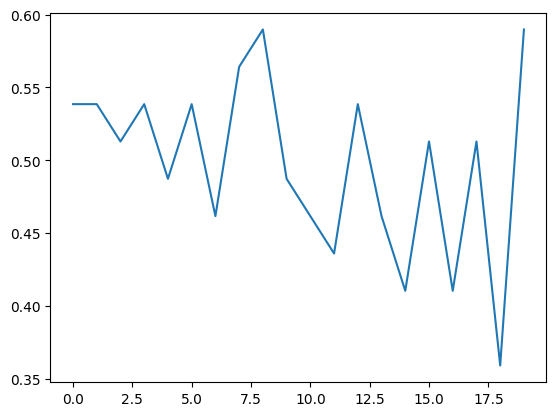

In [12]:
# Plot the training and validation Accuracy curves
plt.plot(history.history['accuracy'])

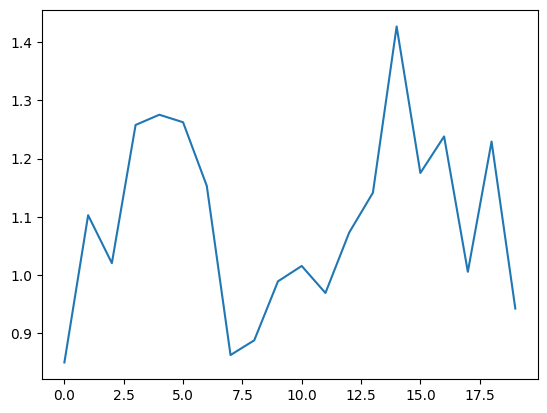

In [13]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'])

In [17]:
# Load the trained model
model.save('cat_dog_face_model.h5')  # Replace with the path to your trained model file

In [18]:
# Make predictions on the test data
predictions = model.predict(test_generator)
# 'predictions' will contain the predicted probabilities for each class for each sample in the test data



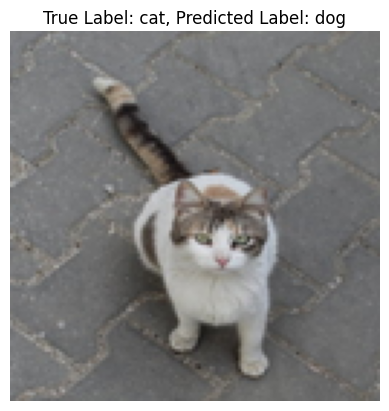

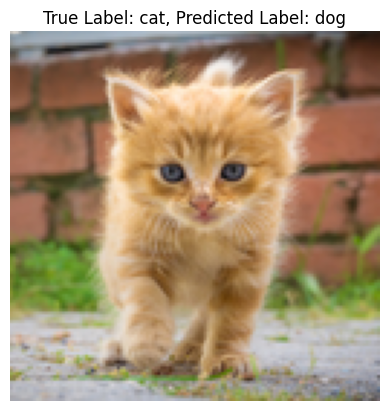

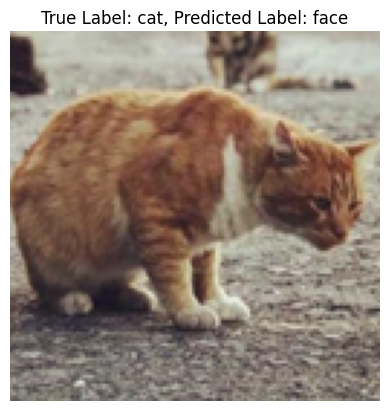

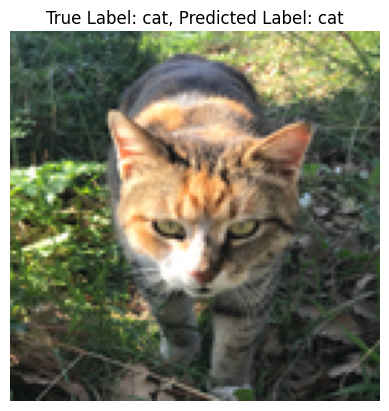

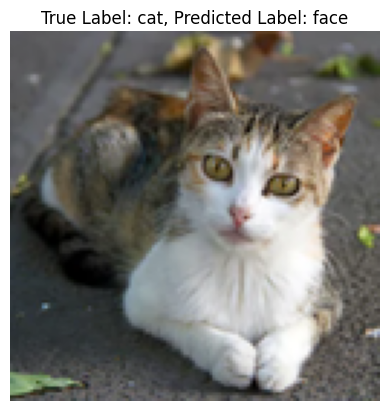

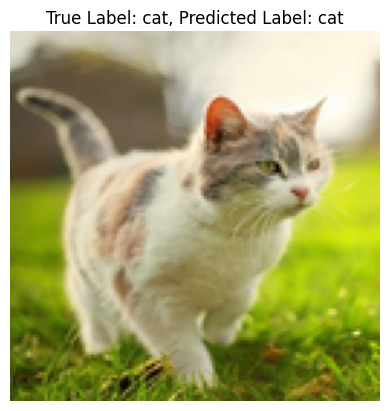

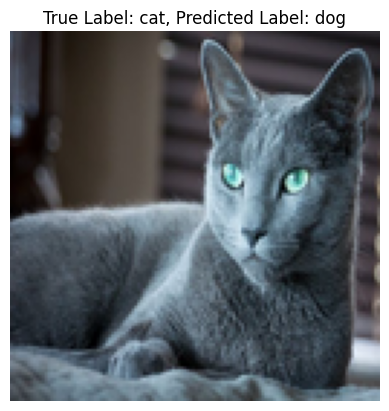

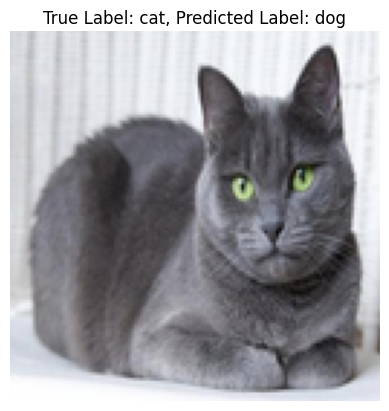

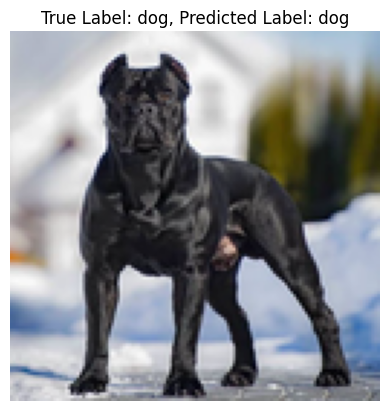

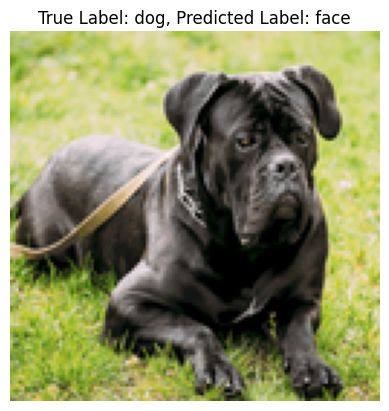

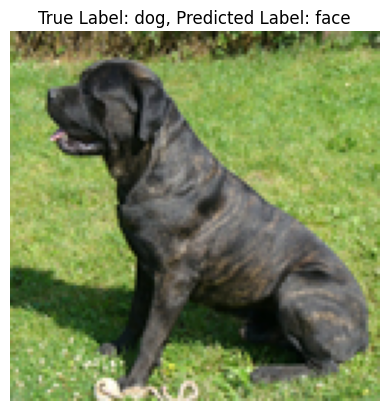

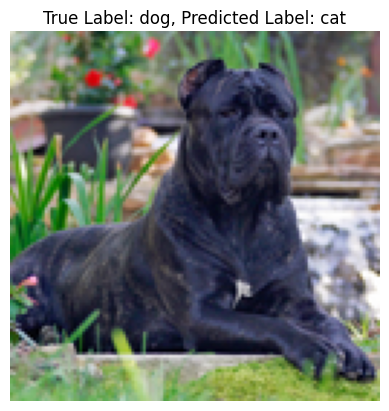

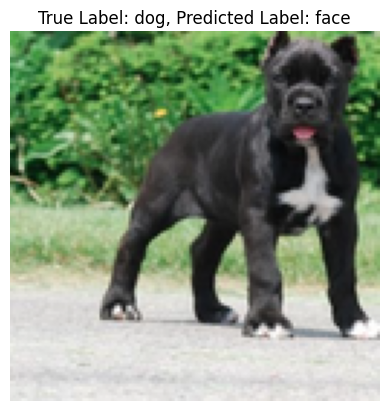

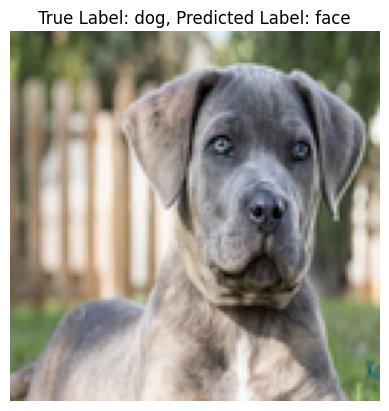

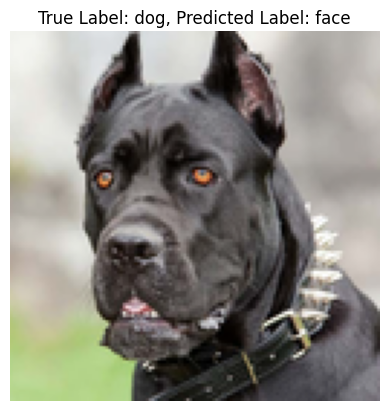

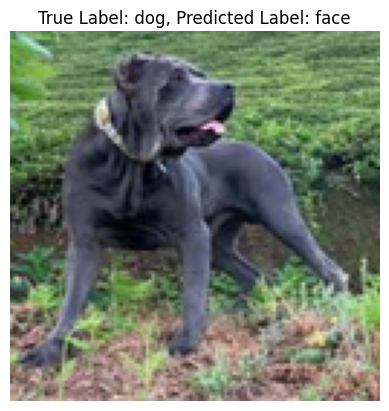

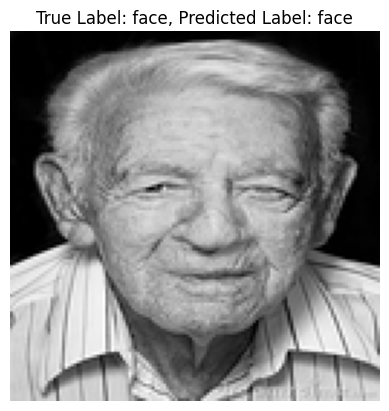

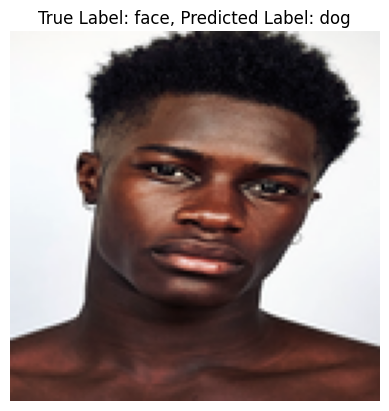

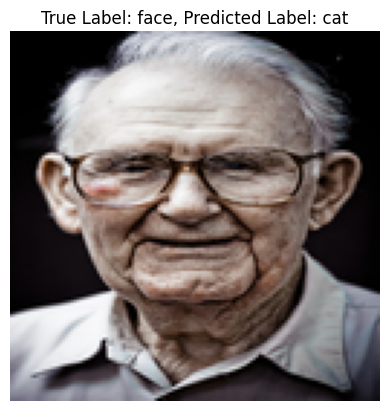

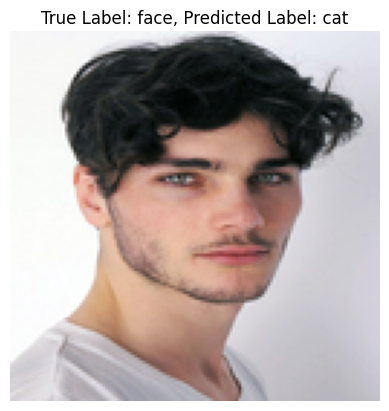

In [19]:
from tensorflow.keras.preprocessing import image
# Retrieve the true class labels
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Display the first few images with true and predicted labels
for i in range(20):  # Display the first 5 images (you can change this number)
    plt.figure()
    plt.imshow(image.load_img(os.path.join(test_dir, test_generator.filenames[i])))
    plt.title(f"True Label: {class_labels[true_labels[i]]}, Predicted Label: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()
